<b><font size=20, color='#A020F0'>Packaging Code</font></b>

Hannah Zanowski<br>
11/25/24<br>

#### <span style="color:green">Learning Goals</span>
By the end of this notebook you will
1. Practice making a python module with proper format, including docstrings
2. Become familiar with the basic structure and file requirements for creating a python package

#### Resources
[Python Docstring conventions](https://www.python.org/dev/peps/pep-0257/)<br>
[Python style guide](https://www.python.org/dev/peps/pep-0008/)<br>
[Choosing a license](https://choosealicense.com/)<br>
[Python packaging user guide](https://packaging.python.org/en/latest/tutorials/packaging-projects/)<br>
[Pytest documentation](https://docs.pytest.org/en/latest/getting-started.html)

#### Acknowledgements
Special thanks to the python packaging user guide and R. Abernathey's research computing class for providing much of the content in this lecture

# A little about today's lecture

When you find yourself using the same pieces of code over and over again, it might be time to think about turning these into modules that you can package and import into python. This option is less useful for a script that does a task that can only be used in a very specific context, so in today's lecture, we'll focus on an example that fits the former. We'll go through the module building process, the documentation, and the packaging step-by-step in class. The full example package structure and code is in the `make_axis_circular_package` directory.

Let's begin by importing a few packages that we need:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.path as mpath

---

## 1. Revisiting the last problem of Homework 3
In HW3 I provided an example of how you can [make your cartopy polar stereographic plotting axes circular](https://scitools.org.uk/cartopy/docs/v0.15/examples/always_circular_stereo.html) instead of rectangular. Here is a snippet of the code that does so:

```bash
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
circ_ax=axis.set_boundary(circle, transform=axis.transAxes)
```

Let's make a quick plot to be sure this works:

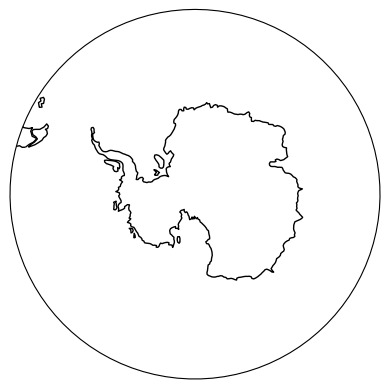

In [2]:
fig=plt.figure()
ax=fig.add_subplot(111,projection=ccrs.SouthPolarStereo())
#circular axis
theta=np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
circ_ax=ax.set_boundary(circle, transform=ax.transAxes)
#add land and set ax extent
ax.set_extent([-180,180,-90,-50],ccrs.PlateCarree())
ax.coastlines()

This is great, but it's pretty annoying to have to include the lines of code for making the plotting axis circular _every_ time we want to make a polar stereographic cartopy map. Instead, we can make this code a module (a function) so that we can import it and use it whenever we want. A simple version of the code would look something like this:

```bash
def make_ax_circular(axis):
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)
    axis.set_boundary(circle, transform=axis.transAxes)
    return axis
```

We could then copy this code to a .py file (just like you did in HW1!) and then import this function as need be. <b>However, in order to be able to import this function, the .py file _must be_ in your current working directory, which is fine, but it isn't very helpful if you want to use this same code in other projects, etc.</b> Rather than copying your .py file to all of your different projects (and risk having multiple versions strewn about) you can instead make your function a package that you can then put in your python environment so that it will always be accessible (as long as the environment that contains the package is active).

---

## 2. Making a module and packaging it

If you're going to make a module and then package it for your own (and possibly others') use, your code must have appropriate documentation. That means...

1) comments for parts of the code where it isn't immediately clear what the code is doing, and 
2) [docstrings](https://www.python.org/dev/peps/pep-0257/) that are properly formatted (docstrings explain what your code does). 

><b><font color='red'>Note: </font></b>Properly formatted docstrings are especially important--following the right conventions means that other software can recognize them as such!

### Circular cartopy axes round 2
Here's an example of the `make_ax_circular` module above but with proper docstring formatting and better comments:

In [3]:
"""
A python module for making cartopy polar stereographic plots
with circular axes.
"""
import numpy as np
import matplotlib.path as mpath

def make_ax_circular(axis):
    """ Make a cartopy plotting axis that is circular instead of rectangular.
    See https://scitools.org.uk/cartopy/docs/v0.15/examples/always_circular_stereo.html
    
    PARAMETERS
    ----------
    axis : a cartopy.mpl.geoaxes instance
    
    RETURNS
    ----------
    axis : the same cartopy.mpl.geoaxes instance but now circular
    
    """
    
    #Compute the angle
    theta = np.linspace(0, 2*np.pi, 100)
    
    #Center and radius of the circle
    center, radius = [0.5, 0.5], 0.5
    
    #Get the vertices of the points along the circle
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    
    #Create the circle line using the vertices, radius,
    #and center of the circle
    circle = mpath.Path(verts * radius + center)
    
    #Set the axis boundary to be the created circle
    axis.set_boundary(circle, transform=axis.transAxes)
    
    return axis

Now let's use the built-in `help()` function to tell us about the `make_ax_circular` module that we just created:

In [4]:
help(make_ax_circular)

Help on function make_ax_circular in module __main__:

make_ax_circular(axis)
    Make a cartopy plotting axis that is circular instead of rectangular.
    See https://scitools.org.uk/cartopy/docs/v0.15/examples/always_circular_stereo.html
    
    PARAMETERS
    ----------
    axis : a cartopy.mpl.geoaxes instance
    
    RETURNS
    ----------
    axis : the same cartopy.mpl.geoaxes instance but now circular



Cool! The help function knows to parse docstrings, and that's what it's been doing every time you use it to learn about a new module. Now let's make sure our module works:

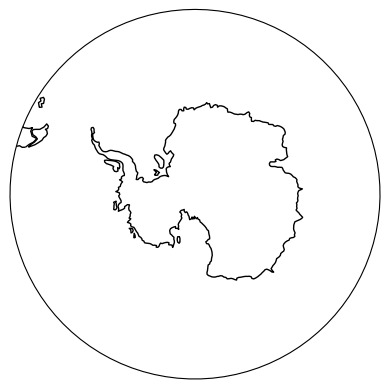

In [5]:
fig=plt.figure()
ax=fig.add_subplot(111,projection=ccrs.SouthPolarStereo())
#circular axis
ax=make_ax_circular(ax)
#add land and set ax extent
ax.set_extent([-180,180,-90,-50],ccrs.PlateCarree())
ax.coastlines()

### Packaging your module
When you're ready to package your code, you need to put it in a .py file and create a nested directory that includes several other setup and initialization files as well. Packages typically follow this very basic structure (you can see the full example package structure and code in the `make_axis_circular_package` directory in the `Lectures` folder):

`make_axis_circular_package/`
- README.md<br>
- LICENSE<br>
- pyproject.toml<br>
- `src/`<br>
    - `make_ax_circular/`<br>
        >\_\_init__.py<br>
        >make_ax_circular_module.py<br>
    - `tests/`<br>
        >\_\_init__.py<br>
        >test_make_ax_circular.py

Here's a brief explanation for all of these files:
1. `README.md`:   A readme explaining what the package does
2. `LICENSE`:    A license that describes the terms under which your work can be reused! See [this licensing website](https://choosealicense.com/) for help
3. `pyproject.toml`: The python code that installs your package so that you can use it in a python environment!
4. `make_ax_circular/__init__.py`: This must be here in order for python to recognize that this is a package; can be empty!
5. `make_ax_circular/make_ax_circular_module.py`: Here's where your actual module is!
6. `make_ax_circular/tests/__init__.py`:   Same as `__init__.py` above, but for testing
7. `make_ax_circular/tests/test_make_ax_circular.py`: A module that tests your make_ax_circular module

---

#### <font color='blue'>Question for the class</font>
If you had a python package called `make_ax_circular` with the directory structure as listed above, what would be the import command you would use to import _only_ the `make_ax_circular` function that we created earlier?

---

#### 1. `pyproject.toml`
A `pyproject.toml` file contains basic information and metadata about your package, including the specific [build backend](https://packaging.python.org/en/latest/glossary/#term-Build-Backend) you are using and the required dependencies (the other packages your package needs in order to work). In our case, we're using [hatchling](https://pypi.org/project/hatchling/) so our `.toml` file lists that in the `[build_system]` heading. You can find more information about setting up `.toml` files [here](https://packaging.python.org/en/latest/guides/writing-pyproject-toml/#writing-pyproject-toml)

A simple `pyproject.toml` file for our `make_ax_circular` package might look something like this:

```bash
[build-system]
requires = ['hatchling','numpy','matplotlib','cartopy']
build-backend = "hatchling.build"

[project]
name = "make_ax_circular"
version = "0.0.1"
authors = [{ name = "your name", email = "your email" }]
description = "A package for making cartopy axes circular"
readme = "README.md"
requires-python = ">=3.8"
classifiers = [
    "Programming Language :: Python :: 3",
    "License :: OSI Approved :: GNU General Public License v3 (GPLv3)",
    "Operating System :: OS Independent"]
```

><b><font color='red'>Note: </font></b> The package name (the distribution name) must be the same as the directory in which the module sits. In this case the `make_ax_circular` module (`make_ax_circular_module.py`) sits in the directory called `make_ax_circular` so that's why the package name in the packages list is also `make_ax_circular`

#### 2. `__init__.py`
This can actually be blank, but it _must be_ in your `make_ax_circular` subdirectory so python can recognize it as a package!

### Testing your module
Tests are important to include in a package if you want to ensure that your code works properly! Python has a nice package called [pytest](https://docs.pytest.org/en/latest/getting-started.html) to help with this. Here's an example of what a test might look like for our `make_ax_circular` module:

```bash
import numpy as np
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import pytest

from make_ax_circular.make_ax_circular_module import make_ax_circular

def test_make_ax_circular():
    #Check that we can't give the wrong type of axes
    with pytest.raises(AttributeError):
         make_ax_circular(plt.axes())
         
    #Check that we can't give the incorrect number of arguments
    with pytest.raises(TypeError):
         make_ax_circular(1,2)
 
    #Check that the output is a cartopy.mpl.geoaxes instance
    assert type(make_ax_circular(plt.axes(projection=ccrs.PlateCarree())))==cartopy.mpl.geoaxes.GeoAxesSubplot
```

You then run your tests in the test directory with `pytest -v`

### Installing your module

If you want to install your package so that you can use it in a python environment you would activate that environment and then run the following in the directory where your `pyproject.toml` file is located:
`python3 -m pip install .`

><b><font color='red'>Note: </font></b> `make_ax_circular` won't install properly in our current class environment owing to some underlying issues with cartopy libraries + the jupyterhub

### Distributing your module

What if you want other people to use your module? That's where [twine](https://pypi.org/project/twine/) and the [Python Package Index](https://pypi.org/) come in. Twine is a tool for publishing packages on PyPI. To publish a python package on PyPI, you need to *build* your package first and then use twine (or another publishing package that you like) to upload your package distribution archives. It's a good idea to use [Test PyPI](https://test.pypi.org/) to upload your package _before_ you upload it to the real PyPI. 

><b><font color='red'>Note: </font></b> You'll need to create a Test PyPI account, verify your email, and create an access token before you can upload packages! You can find detailed info [here](https://packaging.python.org/en/latest/tutorials/packaging-projects/#uploading-the-distribution-archives)

1. <b>To build your package</b>, run the following in the directory where your `pyproject.toml` file is located: `python3 -m build`
2. <b>To upload your package to test PyPI</b>, all you need to do is upload everything in the `dist` directory that is created after you've built it: <br>`python3 -m twine upload --repository testpypi dist/*`

---

## 3. Exploring a real-world example
Although you have a very brief example of a python package setup in the `make_axis_circular_package` directory provided with this lecture, it can be informative to see how this looks in practice with an actual python package. Let's take a look at the [MetPy](https://github.com/Unidata/MetPy) package on GitHub.

---